# Tarefa 2

Para essa tarefa, selecionei o dataset do Kaggle [CS:GO Competitive Matchmaking Data](https://www.kaggle.com/datasets/skihikingkevin/csgo-matchmaking-damage). Esse dataset utiliza dados disponibilizados pelo jogo CS:GO. Dando um breve contexto sobre o jogo, trata-se de um dos jogos de eSport mais jogados do mundo. É um jogo de First-Person Shooter (FPS) e é, hoje, um dos jogos mais jogados do Brasil.

## Explicando o dataset

Esse dataset possui dados que foram coletados em Agosto de 2018 dentro do jogo sobre dados associados aos mapas onde os jogadores jogam. No link do Kaggle há uma explicação mais detalhada, contendo inclusive metadados sobre as colunas

## Carregando o dataset

In [147]:
import pandas as pd

df = pd.read_csv('./data/mm_master_demos.csv', index_col=0)
map_bounds = pd.read_csv('./data/map_data.csv', index_col=0)
df.head()

,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,...,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8482,133.0582,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198123082770,17,1473.847,1351.358,662.170,772.748,PISTOL_ROUND,2950,3850,16.0
1,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8600,134.9023,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198051040004,17,-1211.723,1060.813,-1184.006,1153.343,PISTOL_ROUND,2950,3850,16.0
2,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8610,135.0586,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198223006752,16,-1153.584,1163.131,-1198.015,1050.423,PISTOL_ROUND,2950,3850,16.0
3,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8624,135.2774,Team 1,Team 2,CounterTerrorist,Terrorist,...,76561198051040004,17,-1173.053,1044.365,-1141.785,1190.089,PISTOL_ROUND,2950,3850,16.0
4,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8632,135.4024,Team 2,Team 1,Terrorist,CounterTerrorist,...,76561198223006752,16,-1142.522,1200.967,-1157.690,1050.702,PISTOL_ROUND,2950,3850,16.0


## Análise 1: Gráfico de barras

Para o gráfico de barras irei avaliar os rounds de pistol (primeiro round do jogo) para avaliar as armas mais utiliadas

In [148]:
df_pistol = df[df['round_type'] == 'PISTOL_ROUND']
print("Total Number of Pistol Rounds: %i" % df_pistol.groupby(['file', 'round'])['tick'].first().count())

Total Number of Pistol Rounds: 2568


In [149]:
pistol_buys = df_pistol.groupby(['file', 'round', 'att_side', 'wp'])['hp_dmg'].first()
pistol_buys = (pistol_buys.groupby(['wp']).count()/pistol_buys.groupby(['wp']).count().sum())*100.
pistol_buys = pistol_buys.sort_values(ascending=False)

pistol_buys

wp
USP             28.703464
Glock           22.959316
P2000           10.080332
P250             8.473698
HE               6.296968
FiveSeven        4.724886
Tec9             4.586680
Deagle           4.016585
Unknown          3.394662
Knife            2.755463
CZ               1.667099
DualBarettas     1.347499
Incendiary       0.475080
Smoke            0.095016
Flash            0.077740
Molotov          0.060465
UMP              0.051827
Zeus             0.043189
MP7              0.034551
AK47             0.025913
Scout            0.025913
P90              0.025913
Mac10            0.025913
M4A4             0.017276
Decoy            0.017276
MP9              0.017276
Name: hp_dmg, dtype: float64

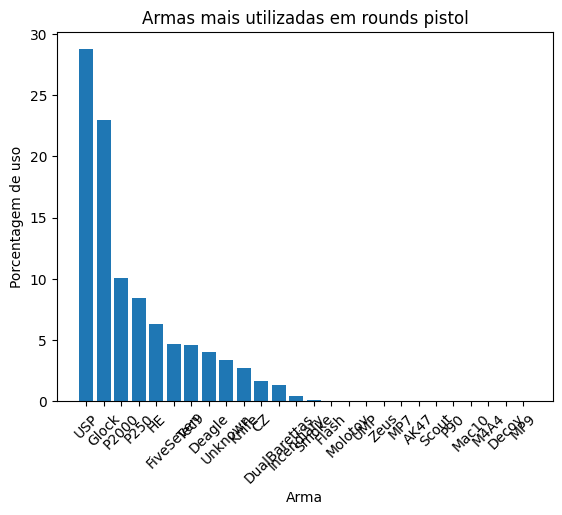

In [150]:
import matplotlib.pyplot as plt

y = pistol_buys.index.tolist()
x = pistol_buys.tolist()

plt.bar(y, x)
plt.xlabel("Arma")
plt.ylabel("Porcentagem de uso")
plt.title("Armas mais utilizadas em rounds pistol")
plt.xticks(rotation=45)
plt.show()

Como podemos ver, acima, fica bastante confuso de ler por conta da quantidade de itens. Irei deixar separado apenas os 10 mais utilizados, agrupando o resto

In [151]:
readable_pistol_buys = pistol_buys[:10]
readable_pistol_buys_other = pistol_buys[10:]

readable_pistol_buys['Outros'] = readable_pistol_buys_other.sum()
readable_pistol_buys

wp
USP          28.703464
Glock        22.959316
P2000        10.080332
P250          8.473698
HE            6.296968
FiveSeven     4.724886
Tec9          4.586680
Deagle        4.016585
Unknown       3.394662
Knife         2.755463
Outros        4.007947
Name: hp_dmg, dtype: float64

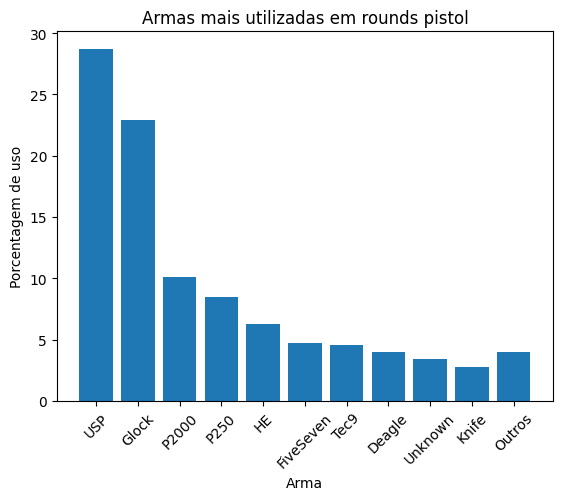

In [152]:
y = readable_pistol_buys.index.tolist()
x = readable_pistol_buys.tolist()

plt.bar(y, x)
plt.xlabel("Arma")
plt.ylabel("Porcentagem de uso")
plt.title("Armas mais utilizadas em rounds pistol")
plt.xticks(rotation=45)
plt.show()

## Análise 2: Histograma

Para o gráfico de histograma irei avaliar o dano causado por rodada

In [153]:
damage = df['hp_dmg']
damage

0      100
1       25
2       20
3       17
4       12
      ... 
837      8
838      8
839      8
840      8
841      5
Name: hp_dmg, Length: 955466, dtype: int64

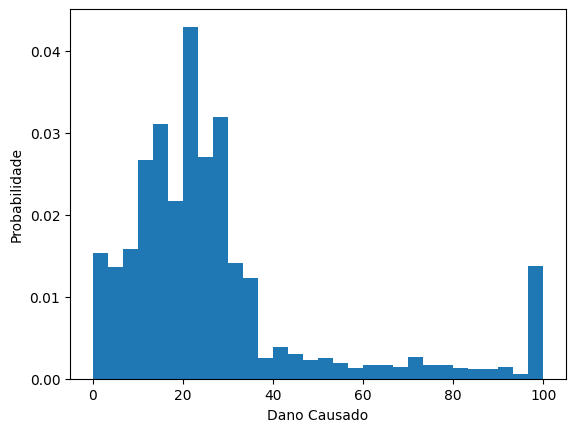

In [154]:
import matplotlib.pyplot as plt

plt.hist(damage, density=True, bins=30)
plt.ylabel('Probabilidade')
plt.xlabel('Dano Causado');

## Análise 3: Gráfico de dispersão

Para o gráfico de dispersão irei avaliar a média de dano causado por arma, considerando a quantidade de amostras que temos e filtrado para as armas mais usadas

In [155]:
damage_per_weapon = df.groupby(['wp'])['hp_dmg'].agg(['count', 'mean']).sort_values('count', ascending=False)[:10]
damage_per_weapon

,count,mean
wp,,
AK47,224607,30.189210
M4A4,85046,25.136397
M4A1,61057,25.768086
UMP,54685,21.419493
P90,49452,18.592817
USP,47033,27.362809
Glock,45237,21.924641
Incendiary,42545,4.833517
AWP,39373,81.221522


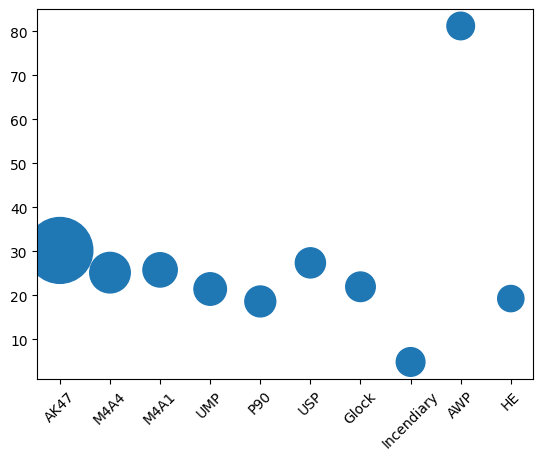

In [156]:
damage = damage_per_weapon['mean']
weapon = damage_per_weapon.index
count = damage_per_weapon['count']

plt.scatter(x=weapon, y=damage, s=count/100)
plt.xticks(rotation=45)
plt.show()

## Conclusão final

Tentei explorar os gráficos na direção de entender o comportamento dos jogares em relação as armas e o dano que elas causam. A construção deles foi extremamente valiosa para o entendimento dos dados.

O gráfico de barra me ajudou a validar algumas hipóteses que eu já possuia sobre o jogo, como: as armas mais utilizadas em rounds de pistol são as armas que os usuários já recebem (USP e Glock).

O histograma, por outro lado, me trouxe uma leitura que eu não tinha do jogo até então. Eu Imaginava que o dano causado fosse uma distribuição normal, porém eu vi uma grande quebra nos dados próximo aos 40 hp de dano. O máximo que um jogador pode causar de dano é 100, dito isso, eu entendia (até então) que provavelmente isso seria uma curva normal. O que vi no gráfico é que muitos usuários jogam mal (dando até 40 de dano no máximo) e há uma grande quantidade que fica próximo dos 100, porém a faixa entre 40 e 100 é bem pequena. Isso foi bastante surpreendente para mim.

Por fim, o gráfico de dispersão me mostrou outro ponto que eu não esperava, boa parte das armas possuem um dano bem próximo em média. Muitas giram entre 20 e 30 de dano, dando apenas um destaque para a AWP (a arma mais forte do jogo) onde o dano fica bastante alto.

Em linhas gerais, os gráficos foram bastante informativos e me mostraram uma série de informações que eu não conhecia.